In [40]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import logging
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import re

In [41]:
# Define paths to training and test data
train_path = "E:/New_folder/Genre_Classification_Dataset/train_data.txt"
movies_train=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'])

test_path="E:/New_folder/Genre_Classification_Dataset/test_data_solution.txt"
movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'])

C:\Users\Padma\AppData\Local\Temp\ipykernel_15712\3974385682.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_train=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'])
C:\Users\Padma\AppData\Local\Temp\ipykernel_15712\3974385682.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'])


In [42]:
# Combine training and test data into a single DataFrame for preprocessing
df = pd.concat([movies_train, movies_test])

In [43]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['genre'], test_size=0.2, random_state=42)

In [44]:
# Feature extraction using CountVectorizer (you can also use TfidfVectorizer)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [45]:
# Model training using Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [46]:
# Model prediction
y_pred = model.predict(X_test_vec)

In [47]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.53


In [48]:
# Display classification report
report = classification_report(y_test, y_pred)
print(report)

               precision    recall  f1-score   support

      action        0.40      0.48      0.44       526
       adult        0.42      0.57      0.48       228
   adventure        0.29      0.25      0.27       304
   animation        0.27      0.23      0.25       211
   biography        0.07      0.09      0.08       103
      comedy        0.59      0.48      0.53      2988
       crime        0.19      0.30      0.24       223
 documentary        0.73      0.65      0.68      5185
       drama        0.64      0.56      0.60      5550
      family        0.23      0.26      0.24       288
     fantasy        0.18      0.23      0.20       147
   game-show        0.50      0.70      0.58        73
     history        0.14      0.17      0.15       116
      horror        0.59      0.67      0.63       883
       music        0.33      0.75      0.46       300
     musical        0.15      0.14      0.14       114
     mystery        0.15      0.18      0.16       114
        n

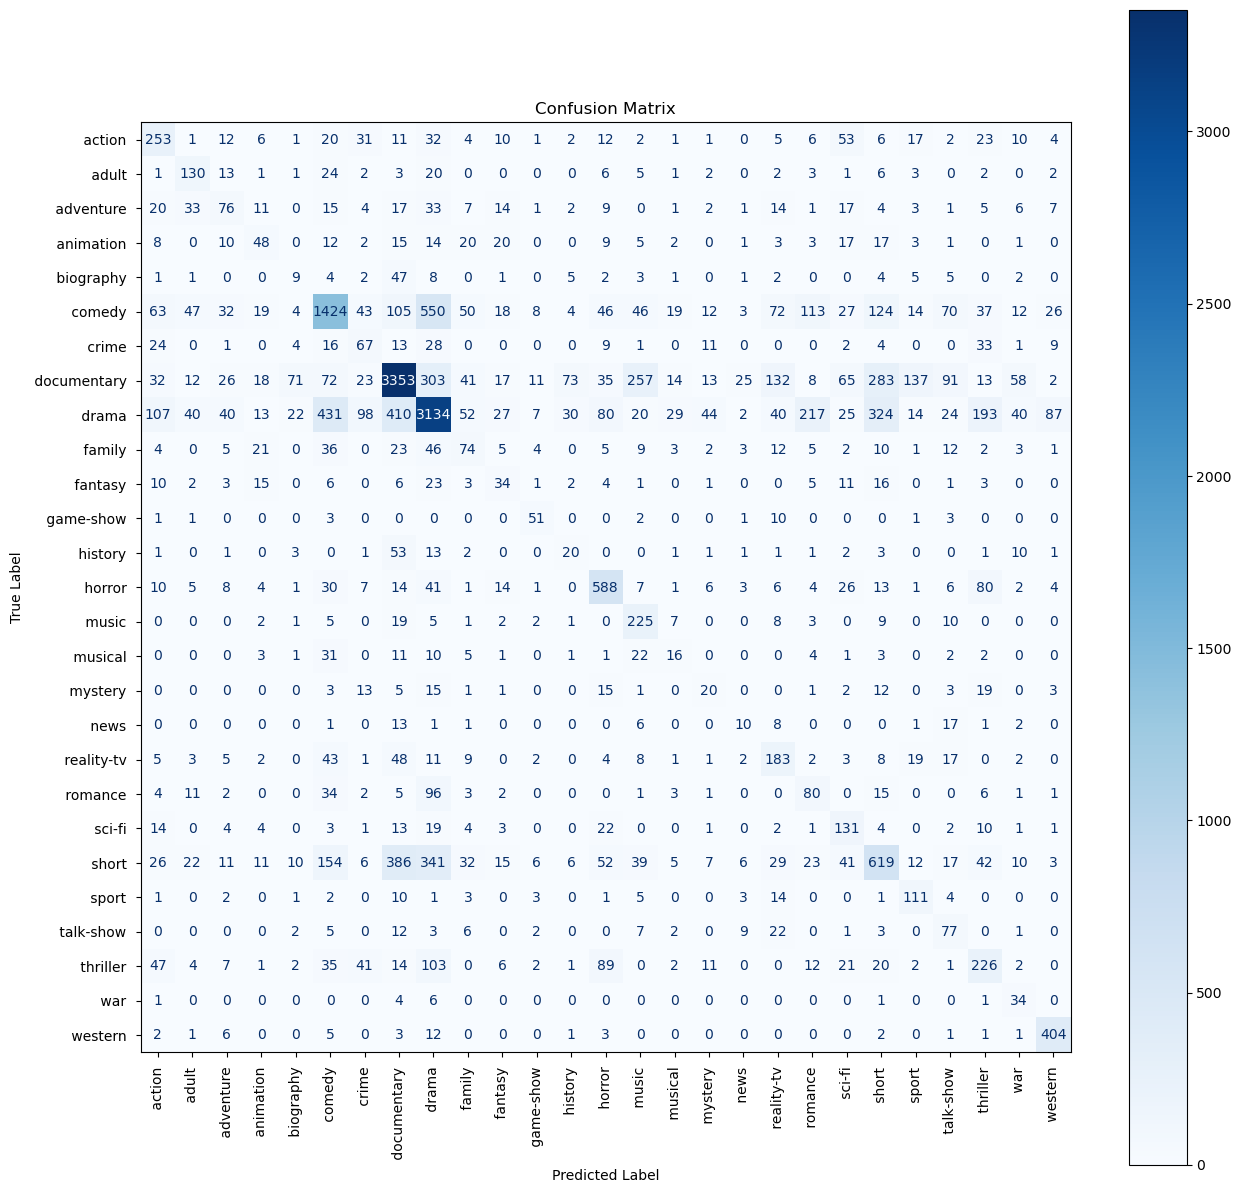

In [49]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15, 15))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
# Model training using Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=10000)

In [51]:
# Model prediction
y_pred1 = model.predict(X_test_vec)

In [52]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.56


In [53]:
# Display classification report
report = classification_report(y_test, y_pred1)
print(report)

               precision    recall  f1-score   support

      action        0.38      0.35      0.36       526
       adult        0.45      0.36      0.40       228
   adventure        0.26      0.23      0.24       304
   animation        0.27      0.18      0.21       211
   biography        0.02      0.01      0.01       103
      comedy        0.54      0.55      0.55      2988
       crime        0.19      0.12      0.14       223
 documentary        0.71      0.75      0.73      5185
       drama        0.58      0.67      0.62      5550
      family        0.22      0.22      0.22       288
     fantasy        0.20      0.10      0.13       147
   game-show        0.67      0.51      0.58        73
     history        0.07      0.03      0.04       116
      horror        0.61      0.59      0.60       883
       music        0.54      0.49      0.52       300
     musical        0.22      0.11      0.15       114
     mystery        0.17      0.14      0.15       114
        n

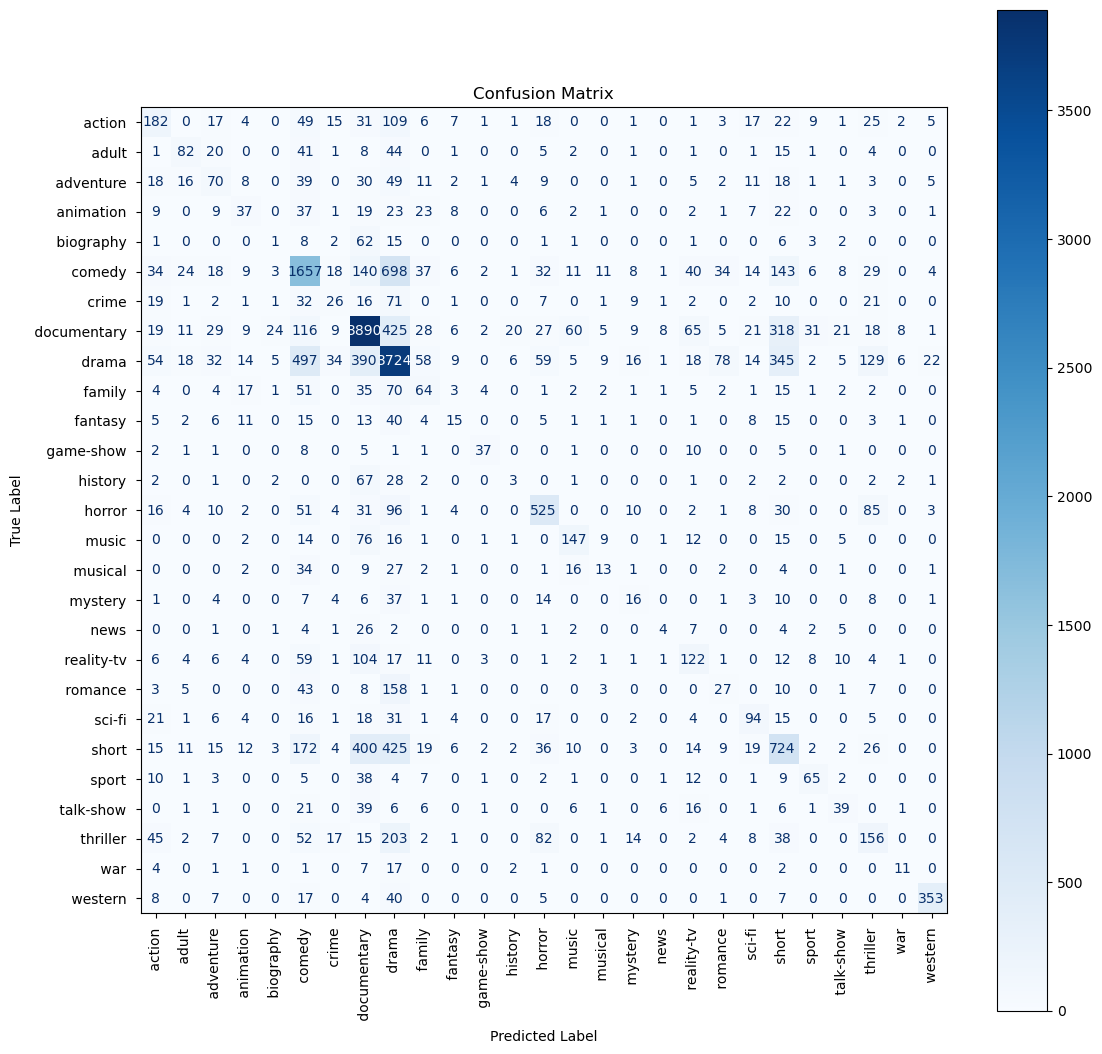

In [54]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred1, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(13, 13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
# Model training using LinearSVC
model = LinearSVC(max_iter=2000)
model.fit(X_train_vec, y_train)

C:\Users\Padma\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Padma\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=2000)

In [56]:
# Model prediction
y_pred2 = model.predict(X_test_vec)

In [57]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.53


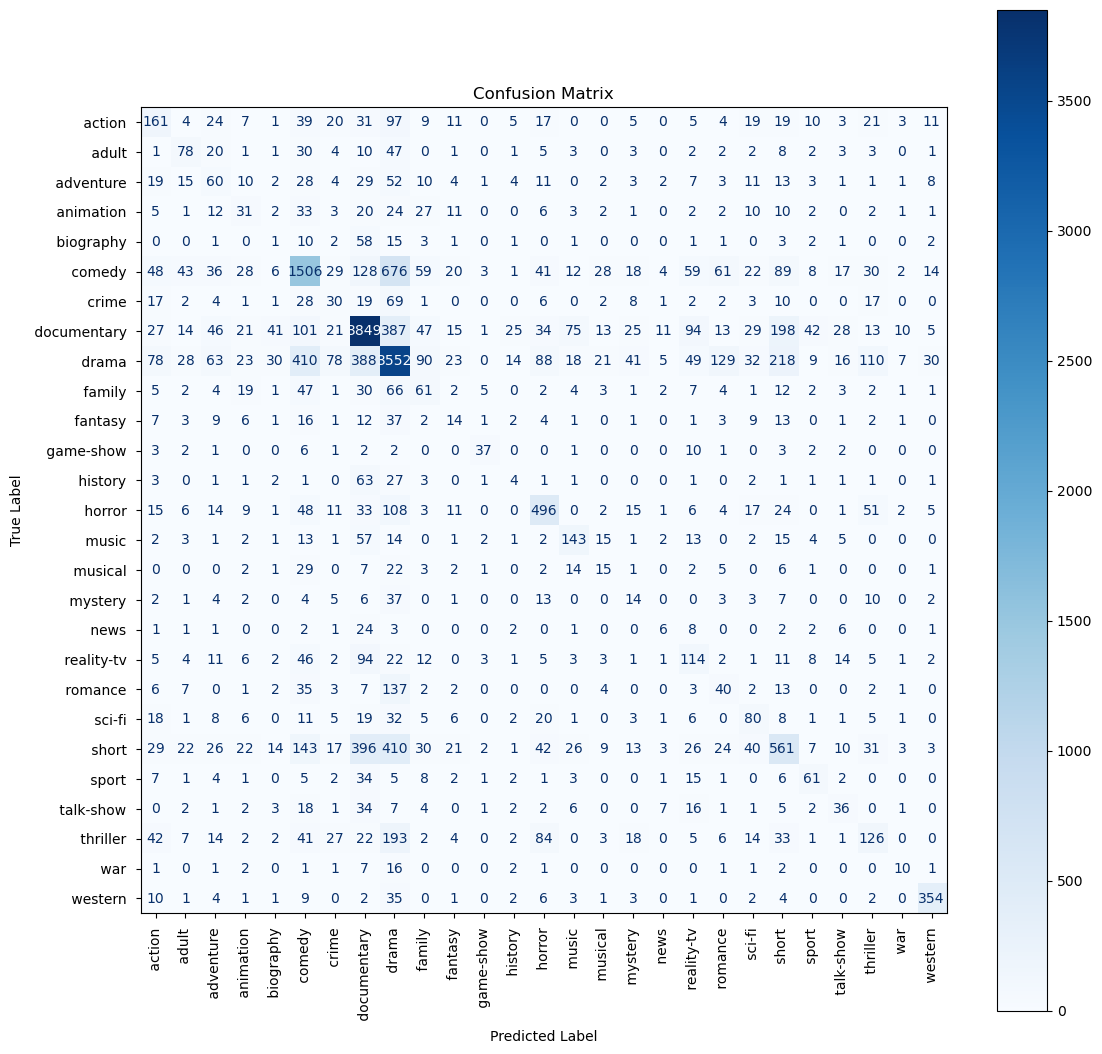

In [58]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred2, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(13, 13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()